In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_19 = pd.read_excel('KOBIS_2019.xlsx', sep='\t')[:50]
data_20 = pd.read_excel('KOBIS_2020.xlsx', sep='\t')[:50]
movie_df = pd.concat([data_19, data_20])
movie_df.reset_index(inplace = True)
movie_df.drop(['index', '순위'], axis = 1, inplace=True)

In [4]:
col = list(movie_df.columns)
for i in ['국적', '매출액 점유율', '상영횟수', '스크린수']:
    col.remove(i)
movie_df = movie_df[col]

In [5]:
# 겹치는 영화 처리하는 함수
# 영화명, 개봉일, 대표국적, 배급사 : 관객수 많은 행 사용
# 매출액, 관객수 : 더해서 사용

def duplicate_movie(movie_df):
    # 겹치는 영화 확인
    movie_cnt = movie_df['영화명'].value_counts()
    num = 0
    dup_movie = []

    for i in movie_cnt:
        if i == 2:
            dup_movie.append(movie_cnt.index[num])
        num += 1
    
    # 관객수 적은 행 
    small_movie = []
    for name in dup_movie:
        small_view = (movie_df[movie_df['영화명'] == name].loc[:,'관객수'] > movie_df[movie_df['영화명'] == name].loc[:,'관객수'].mean())
        small_movie.extend(small_view.index[small_view])
        
    # 매출액, 관객수 합 사용
    for name in dup_movie:
        dup_movie_idx = movie_df[movie_df['영화명'] == name].index
        movie_df.loc[dup_movie_idx, '관객수'] = movie_df[movie_df['영화명']== name].loc[:,'관객수'].sum()
        movie_df.loc[dup_movie_idx, '매출액'] = movie_df[movie_df['영화명']== name].loc[:,'매출액'].sum()
        
    # 관객수 적은 행 삭제
    movie_df = movie_df.drop(small_movie)

    return movie_df

In [6]:
movie_df = duplicate_movie(movie_df)

In [7]:
# 중복되는 영화 제거 후 영화명
movie_name = list(movie_df.loc[:, '영화명'])
print(movie_name)

['극한직업', '어벤져스: 엔드게임', '엑시트', '스파이더맨: 파 프롬 홈', '캡틴 마블', '조커', '봉오동 전투', '라이온 킹', '나쁜 녀석들: 더 무비', '82년생 김지영', '분노의 질주: 홉스&쇼', '토이 스토리 4', '돈', '악인전', '가장 보통의 연애', '말모이', '증인', '블랙머니', '터미네이터: 다크 페이트', '사바하', '타짜: 원 아이드 잭', '신의 한 수: 귀수편', '알리타: 배틀 엔젤', '내안의 그놈', '뺑반', '변신', '주먹왕 랄프 2: 인터넷 속으로', '걸캅스', '사자', '아쿠아맨', '드래곤 길들이기 3', '나의 특별한 형제', '어스', '말레피센트 2', '유열의 음악앨범', '퍼펙트맨', '포드 V 페라리', '생일', '힘을 내요, 미스터 리', '항거:유관순 이야기', '장사리 : 잊혀진 영웅들', '마이펫의 이중생활 2', '롱 리브 더 킹: 목포 영웅', '쥬만지: 넥스트 레벨', '존 윅 3: 파라벨룸', '남산의 부장들', '다만 악에서 구하소서', '반도', '히트맨', '테넷', '백두산', '#살아있다', '강철비2: 정상회담', '담보', '닥터 두리틀', '삼진그룹 영어토익반', '정직한 후보', '도굴', '클로젯', '오케이 마담', '해치지않아', '천문: 하늘에 묻는다', '결백', 1917, '작은 아씨들', '미드웨이', '시동', '지푸라기라도 잡고 싶은 짐승들', '미스터 주: 사라진 VIP', '인비저블맨', '나쁜 녀석들: 포에버', '국제수사', '침입자', '스타워즈: 라이즈 오브 스카이워커', '스파이 지니어스', '이웃사촌', '온워드: 단 하루의 기적', '소리도 없이', '버즈 오브 프레이(할리 퀸의 황홀한 해방)', '원더 우먼 1984', '겨울왕국 2', '오! 문희', '그린랜드', '위대한 쇼맨', '런', '뮬란', '내가 죽던 날', '기생충', '신비아파트 극장판 하늘도깨비 대 요르문간드', '프리즌 이스케이프', '

# Check Feature

## Audiences(관객수)

In [9]:
# 과학적 표기법(지수표현식)으로 나와서 설정 변경
pd.options.display.float_format = '{:.1f}'.format

In [10]:
# 결측값 없음
movie_df['관객수'].isnull().sum()

0

In [11]:
movie_df['관객수'].describe()

count         95.0
mean     2501951.6
std      3160200.7
min       182026.0
25%       616090.0
50%      1507922.0
75%      2673812.5
max     16265618.0
Name: 관객수, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current fon

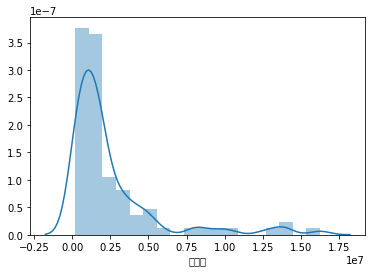

In [14]:
# ad : audiences
# 한국어 오류 해결
ad_plot = sns.distplot(movie_df['관객수'])
plt.show()

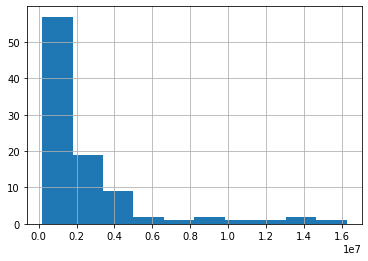

In [13]:
fig, ax = plt.subplots()
fig = movie_df['관객수'].hist(ax=ax)
plt.show()